In [5]:

from google.colab import files
import pandas as pd

#Upload the CSV file
uploaded = files.upload()

#Command for upload only one CSV file
filename = next(iter(uploaded))

#Read the CSV file into a DataFrame
df = pd.read_csv(filename)

#Display the first few rows of the DataFrame
print(df.head())

Saving DOHMH_New_York_City_Restaurant_Inspection_Results_20250516.csv to DOHMH_New_York_City_Restaurant_Inspection_Results_20250516.csv
      CAMIS                   DBA       BORO BUILDING            STREET  \
0  50167352  TOFU VILLAGE 156 INC     Queens   15616A     NORTHERN BLVD   
1  50163339          BANG COOKIES   Brooklyn      445      ALBEE SQUARE   
2  50158427    ESTANCIA PIOLA 288   Brooklyn      288          3 AVENUE   
3  50164501              TEAKWOOD  Manhattan      345  GREENWICH STREET   
4  50164861     Irie Jerk Chicken  Manhattan      245  WEST   46 STREET   

   ZIPCODE       PHONE CUISINE DESCRIPTION INSPECTION DATE ACTION  ...  \
0  11354.0  7187990777                 NaN      01/01/1900    NaN  ...   
1  11201.0  9737714540                 NaN      01/01/1900    NaN  ...   
2  11215.0  6462469851                 NaN      01/01/1900    NaN  ...   
3  10013.0  5166930720                 NaN      01/01/1900    NaN  ...   
4  10036.0  9295312475                 NaN 

In [6]:
df.describe(include='all')

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
count,2.823020e+05,282299,282302,281999,282299,279486.000000,282293,279348,282302,279348,...,279348,281934.000000,281934.000000,278933.000000,278956.000000,278956.000000,2.775740e+05,2.817460e+05,278933,0.0
unique,NaN,24209,6,7559,2451,NaN,26879,89,1809,5,...,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193,NaN
top,NaN,DUNKIN,Manhattan,1,BROADWAY,NaN,2126159700,American,01/01/1900,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MN17,NaN
freq,NaN,3304,104329,1366,10785,NaN,167,44958,2954,264858,...,149804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15966,NaN
mean,4.786606e+07,NaN,NaN,NaN,NaN,10706.684585,NaN,NaN,NaN,NaN,...,NaN,40.321059,-73.203696,254.879258,20.718999,29734.211937,2.580875e+06,2.475852e+09,NaN,NaN
std,3.870616e+06,NaN,NaN,NaN,NaN,595.605318,NaN,NaN,NaN,NaN,...,NaN,4.048389,7.349291,130.225434,15.764297,31176.125764,1.350061e+06,1.335243e+09,NaN,NaN
min,3.007544e+07,NaN,NaN,NaN,NaN,8512.000000,NaN,NaN,NaN,NaN,...,NaN,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,NaN,NaN
25%,5.000001e+07,NaN,NaN,NaN,NaN,10023.000000,NaN,NaN,NaN,NaN,...,NaN,40.684913,-73.988967,106.000000,4.000000,8000.000000,1.051601e+06,1.011130e+09,NaN,NaN
50%,5.008222e+07,NaN,NaN,NaN,NaN,11101.000000,NaN,NaN,NaN,NaN,...,NaN,40.731409,-73.956698,302.000000,20.000000,17200.000000,3.021350e+06,3.007940e+09,NaN,NaN
75%,5.011984e+07,NaN,NaN,NaN,NaN,11231.000000,NaN,NaN,NaN,NaN,...,NaN,40.761128,-73.896154,401.000000,34.000000,42200.000000,4.008876e+06,4.005950e+09,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282302 entries, 0 to 282301
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  282302 non-null  int64  
 1   DBA                    282299 non-null  object 
 2   BORO                   282302 non-null  object 
 3   BUILDING               281999 non-null  object 
 4   STREET                 282299 non-null  object 
 5   ZIPCODE                279486 non-null  float64
 6   PHONE                  282293 non-null  object 
 7   CUISINE DESCRIPTION    279348 non-null  object 
 8   INSPECTION DATE        282302 non-null  object 
 9   ACTION                 279348 non-null  object 
 10  VIOLATION CODE         277537 non-null  object 
 11  VIOLATION DESCRIPTION  277537 non-null  object 
 12  CRITICAL FLAG          282302 non-null  object 
 13  SCORE                  267672 non-null  float64
 14  GRADE                  138095 non-nu

In [8]:
print(df['CRITICAL FLAG'].unique())
print(df['CAMIS'].unique())
df.dropna(how = 'any', subset=['CRITICAL FLAG'], inplace=True) # Drop rows where any value in column 'CRITICAL FLAG' is nan
df.dropna(how = 'any', subset=['CAMIS'], inplace=True) # Drop rows where any value in column 'CAMIS' is nan
df.groupby(['CRITICAL FLAG','BORO','ZIPCODE'])['CRITICAL FLAG'].count().sort_values(ascending=False)



['Not Applicable' 'Not Critical' 'Critical']
[50167352 50163339 50158427 ... 50151208 50135548 50133002]


CRITICAL FLAG   BORO       ZIPCODE
Critical        Manhattan  10013.0    3466
                           10003.0    3393
                Queens     11354.0    3123
                Manhattan  10019.0    3091
                           10001.0    2920
                                      ... 
Not Critical    Manhattan  10107.0       1
Not Applicable  Queens     11370.0       1
Not Critical    Manhattan  10048.0       1
                           10176.0       1
Not Applicable  Manhattan  10281.0       1
Name: CRITICAL FLAG, Length: 653, dtype: int64

In [9]:
df.groupby(['CRITICAL FLAG','VIOLATION DESCRIPTION','VIOLATION CODE','BORO'])['CRITICAL FLAG'].count().sort_values(ascending=False)

CRITICAL FLAG  VIOLATION DESCRIPTION                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         VIOLATION CODE  BORO         
Not Critical   Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       10F             Manhattan        12151
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Brooklyn          8245
               Establishment is not free of harborage or conditions conducive to rodents, insects or other pests.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            08A             Manhattan         7983
               Non-food c

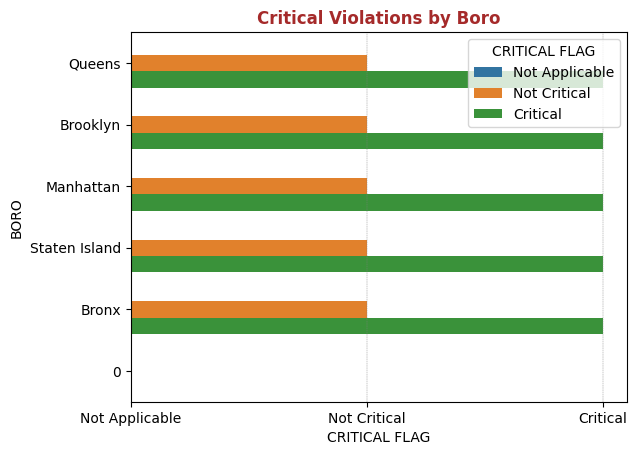

In [10]:
#the analysis should include one visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Visualization
ax = sns.barplot(data = df, x = 'CRITICAL FLAG', y = 'BORO', hue = 'CRITICAL FLAG', estimator='median', errorbar=None, orient="y")
plt.title('Critical Violations by Boro', fontweight='bold', color='brown', loc='center')
ax.set_xlabel('CRITICAL FLAG')
ax.set_ylabel('BORO')
ax.xaxis.grid(True, linestyle='--', linewidth=0.3, color='gray') # Customized grid appearance

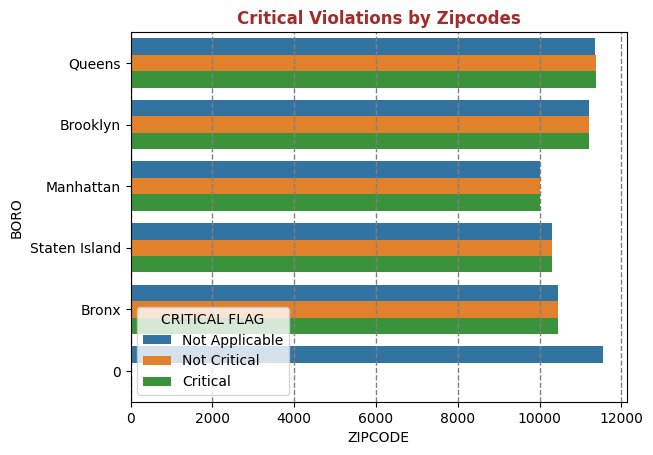

In [11]:
#the analysis should include one visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Visualization
ax = sns.barplot(data = df, x = 'ZIPCODE', y = 'BORO',hue = 'CRITICAL FLAG', estimator='median', errorbar=None, orient="y")
plt.title('Critical Violations by Zipcodes', fontweight='bold', color='brown', loc='center')
ax.set_xlabel('ZIPCODE')
ax.set_ylabel('BORO')
ax.xaxis.grid(True, linestyle='--', linewidth=1.0, color='gray') # Customized grid appearance

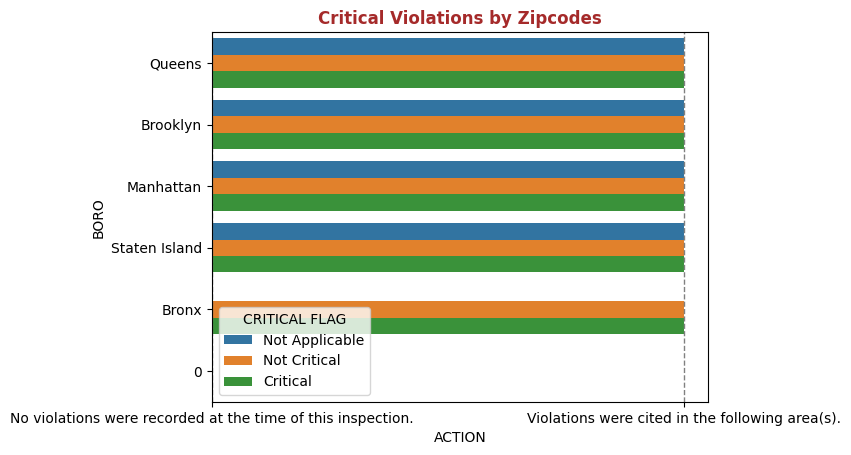

In [12]:
#the analysis should include one visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Visualization
ax = sns.barplot(data = df, x = 'ACTION', y = 'BORO',hue = 'CRITICAL FLAG', estimator='median', errorbar=None, orient="y")
plt.title('Critical Violations by Zipcodes', fontweight='bold', color='brown', loc='center')
ax.set_xlabel('ACTION')
ax.set_ylabel('BORO')
ax.xaxis.grid(True, linestyle='--', linewidth=1.0, color='gray') # Customized grid appearance